### Unit2_Lesson2_naive_bayes_drill

##### Unsing Naive Bayes analyse feedback: categorization of feebacks into positive or negative - Amazon data

In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import scipy
%matplotlib inline

##### Import the raw data as a table. This forms the trianing dataset for our model

In [46]:
#import raw data (Amazon). This data is in txt consisting of tab seperated lines, each line represents a feedback.
#0 or 1 appended to the start of every feedback represent the classification of the previous feedback. 0 means negative while 
#one means positive.

raw_data_amazon = pd.read_table('amazon_cells_labelled_2_2_drill.txt', sep='\t')

In [47]:
raw_data_amazon.columns = ['feedback', 'classification']
raw_data_amazon.head()

,feedback,classification
0,"Good case, Excellent value.",1
1,Great for the jawbone.,1
2,Tied to charger for conversations lasting more...,0
3,The mic is great.,1
4,I have to jiggle the plug to get it to line up...,0


In [48]:
#prepare the 'feedback' column to aid keyword search. Strip all punctuations using re

import re
raw_data_amazon['feedback_striped'] = raw_data_amazon.feedback.apply(lambda x: re.sub(r'[^\w\\x]',' ',x))   

In [49]:
#rearrange columns

cols = raw_data_amazon.columns.tolist()
#print(cols)

processed_data_amazon = raw_data_amazon[['feedback', 
                          'feedback_striped', 
                          'classification'
                          ]]
processed_data_amazon.head()

,feedback,feedback_striped,classification
0,"Good case, Excellent value.",Good case Excellent value,1
1,Great for the jawbone.,Great for the jawbone,1
2,Tied to charger for conversations lasting more...,Tied to charger for conversations lasting more...,0
3,The mic is great.,The mic is great,1
4,I have to jiggle the plug to get it to line up...,I have to jiggle the plug to get it to line up...,0


In [50]:
#create keywords and phrases that closesly surgest a positive feedback and create features with them

keywords_positive = ['fantastic', 'excellent', 'good', 'better', 'best', 'nice', 'amazing', 'awesome', 'value', 'great']

for key in keywords_positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    processed_data_amazon[str(key)] = processed_data_amazon.feedback.str.contains(
        str(key),
        case=False
    )
    
processed_data_amazon.head()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,feedback,feedback_striped,classification,fantastic,excellent,good,better,best,nice,amazing,awesome,value,great
0,"Good case, Excellent value.",Good case Excellent value,1,False,True,True,False,False,False,False,False,True,False
1,Great for the jawbone.,Great for the jawbone,1,False,False,False,False,False,False,False,False,False,True
2,Tied to charger for conversations lasting more...,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,The mic is great,1,False,False,False,False,False,False,False,False,False,True
4,I have to jiggle the plug to get it to line up...,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False


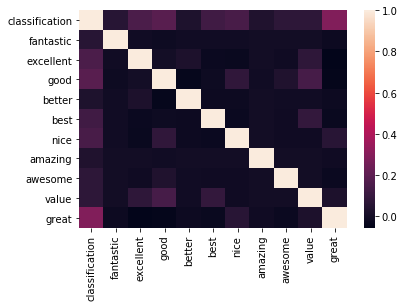

In [51]:
sns.heatmap(processed_data_amazon.corr())

#no significant correllation as per below heatmap

In [52]:
data = processed_data_amazon[keywords_positive]
target = processed_data_amazon['classification']

In [53]:
# Our data is binary / boolean (spam or ham), so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(data, target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [54]:
#predict outcome
y_pred = bnb.predict(data)
#print(y_pred)

#print out accuracy
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
    
))

Number of mislabeled points out of a total 999 points : 309


### Testing our classifier with another with another data (yelp feedback data)

In [55]:
raw_data_yelp = pd.read_table('yelp_labelled_2_2_drill.txt', sep='\t')
raw_data_yelp.columns = ['feedback', 'classification']
raw_data_yelp.head()

,feedback,classification
0,Crust is not good.,0
1,Not tasty and the texture was just nasty.,0
2,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,0


In [56]:
#strip punctuation from data
raw_data_yelp['feedback_striped'] = raw_data_yelp.feedback.apply(lambda x: re.sub(r'[^\w\\x]',' ',x)) 

#rearrange the columns and rename dataframe
processed_data_yelp = raw_data_yelp[['feedback', 
                          'feedback_striped', 
                          'classification'
                          ]]

processed_data_yelp.head()

,feedback,feedback_striped,classification
0,Crust is not good.,Crust is not good,0
1,Not tasty and the texture was just nasty.,Not tasty and the texture was just nasty,0
2,Stopped by during the late May bank holiday of...,Stopped by during the late May bank holiday of...,1
3,The selection on the menu was great and so wer...,The selection on the menu was great and so wer...,1
4,Now I am getting angry and I want my damn pho.,Now I am getting angry and I want my damn pho,0


In [57]:
#use new data(yelp) to run classifier.
#Target will change to the new data
target1 = processed_data_yelp['classification']

#fit the new target into the model - note that data is not changing
bnb.fit(data, target1)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [58]:
#predict outcome
y_pred1 = bnb.predict(data)
#print(y_pred)

#print out accuracy
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target1 != y_pred1).sum()
    
))

Number of mislabeled points out of a total 999 points : 475


##### As can be seen from the result, this model's performance was reduced with a new set of data
With the original data with which the model was built, it only got 309 prediction wrong <br>
Meanwhile it got a whopping 475 predictions wrong with the new data <br>
I thinks it will be beneficial to always build a new model for every set of data for this classifier <br>

### Iterating and improving the classifier

##### Confusion matrix

In [59]:
#first generate a confusion matrix to see what the model is missing out

from sklearn.metrics import confusion_matrix
confusion_matrix(target, y_pred)

array([[476,  23],
       [286, 214]], dtype=int64)

what does the matrix mean? **476 positives** were interpreted as **positives**, **214** **negatives** interpreted as **negatives**. On the flip side **286 positives** were seen as negative (this is a miss or type 1 error), **23 negatives** were seen as positive (false alarm). 

In [60]:
#let's calculat accuracy and sensitivity of our model from the confusion matrix values. Note that the rigth diagonal elements
# are the accurate predictions (476 and 214). The left diagonal elements are inaccurate containing type I and II errors

print ('Accuracy is equal {}'.format((476 + 214)*100/(476 + 214 + 23 + 286)))

Accuracy is equal 69.06906906906907


In [61]:
#what about sensitivity i.e the percentage of positives(spam) correctly identified
print ('sensitivity is equal {}'.format(476*100/(476+286)))

sensitivity is equal 62.46719160104987


In [62]:
#Specificity is just the opposite, the percentage of negatives correctly identified
print ('specivisity is equal {}'.format(214*100/(214+23)))

specivisity is equal 90.29535864978902


### So we really need to work on identifying positive feedbacks(sensitivity) - i.e we need to iterate.

##### Baseline Performance
This is about how to create a threshold for our model's accuracy. In our case the probabilty that a useless model would correctly precdict a positive feedback is (positive/total) = 76 percent. This is better even than our model with 62 accuracy. On not reason should our model no perform better that a regular guess at the dominant class.

##### Class inbalance
In this model we have way more positive feedback than negative which creates class inbalance and can skew the model towards always predicting a positive feedback.To resolve this problem in real life we could decide to over sample the negative feeback or create synthetic negative feedback samples or under sample the positive to create a balance in the training and test data. We can also try to engineer a stronger feature to identify the minority class. Lastly we can ignore it, which is applicable here as we have the preffered class as majority. 

### Iterating our model for better preformance

##### 1. Optimizing features
Here we will add more positive keywords to better identify positive feedbacks. But first we will check how the existing features are performing and possibly remove any redundant one.

In [63]:
#measuring features' performances

for element in keywords_positive:
    print(element, '=', sum(processed_data_amazon[element] == True))

fantastic = 3
excellent = 27
good = 75
better = 18
best = 22
nice = 24
amazing = 1
awesome = 5
value = 5
great = 98


Here we can see that **amazing**, **fantastic**, **awesome** and **value** are not doing great. But we will still keep them since non of them returned 0. Let's try to add 'best', 'quality', 'highly' and 'very'. The most impactful variables are: 'great', 'good' and 'excellent'

In [64]:
#create keywords and phrases that closesly surgest a positive feedback and create features with them

keywords_positive = ['fantastic', 'excellent', 'good', 'better', 'best', 'nice', 'amazing', 'awesome', 'value', 'great', 'best', 'quality', 'highly', 'very']

for key in keywords_positive:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    processed_data_amazon[str(key)] = processed_data_amazon.feedback.str.contains(
        str(key),
        case=False
    )
    
processed_data_amazon.head()

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,feedback,feedback_striped,classification,fantastic,excellent,good,better,best,nice,amazing,awesome,value,great,quality,highly,very
0,"Good case, Excellent value.",Good case Excellent value,1,False,True,True,False,False,False,False,False,True,False,False,False,False
1,Great for the jawbone.,Great for the jawbone,1,False,False,False,False,False,False,False,False,False,True,False,False,False
2,Tied to charger for conversations lasting more...,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,False,False,False,False,False
3,The mic is great.,The mic is great,1,False,False,False,False,False,False,False,False,False,True,False,False,False
4,I have to jiggle the plug to get it to line up...,I have to jiggle the plug to get it to line up...,0,False,False,False,False,False,False,False,False,False,False,False,False,False


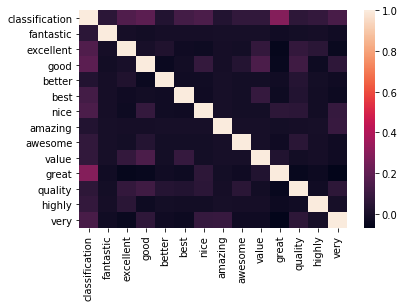

In [65]:
#let's see what the correllation map looks like
sns.heatmap(processed_data_amazon.corr())

In [66]:
#use the new set of features to run classifier.
#Target will change to the new data
target = processed_data_amazon['classification']
data = processed_data_amazon[keywords_positive] #new keyword list


print('WIth new variable added to features:' + str(bnb.fit(data, target).score(data, target)))

y_pred = bnb.predict(data)

print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()))

confusion_matrix(target, y_pred)

WIth new variable added to features:0.7157157157157157
Number of mislabeled points out of a total 999 points : 284


array([[438,  61],
       [223, 277]], dtype=int64)

By adding new keywords to our features, we have been able to improve **accuracy** from **69%** to **72%**.But we went poorer in identifying positive feedbacks from **476** to **438**

##### 2. With 30% Holdout
Let's try holdout with 30 percent

In [67]:
#test the spam model with different holdout groups.

from sklearn.model_selection import train_test_split

#use train_test_split to create necessary training and test groups. Below splits the feature data(x) and 
#target(y) into 80 by 20%

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.2, random_state=20)

#train model with 80% of data and test it with 20% 
print('WIth 20% Holdout:' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

#train model with 100% of data and test it with the same 100% data, just as in the previous lesson 2
print('WIth no Holdout as before:' + str(bnb.fit(data, target).score(data, target)))

WIth 20% Holdout:0.725
WIth no Holdout as before:0.7157157157157157


The hold is not making much impact, shows our model might not be over fitting, let's try 50% hold out to further confirm this.

##### 3. WIth 50% Holdout
with 50% holdout

In [68]:
#test the spam model with different holdout groups.

from sklearn.model_selection import train_test_split

#use train_test_split to create necessary training and test groups. Below splits the feature data(x) and 
#target(y) into 80 by 20%

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size = 0.5, random_state=20)

#train model with 80% of data and test it with 20% 
print('WIth 20% Holdout:' + str(bnb.fit(X_train, y_train).score(X_test, y_test)))

#train model with 100% of data and test it with the same 100% data, just as in the previous lesson 2
print('WIth no Holdout as before:' + str(bnb.fit(data, target).score(data, target)))

WIth 20% Holdout:0.71
WIth no Holdout as before:0.7157157157157157


##### 4. Using cross validation - 10 steps

In [69]:
#implementing cross validation with our spam model
from sklearn.model_selection import cross_val_score
cross_val_score(bnb, data, target, cv=10)

array([0.78      , 0.7       , 0.8       , 0.71      , 0.77      ,
       0.71      , 0.65      , 0.71      , 0.7       , 0.58585859])

The **0.65** and **0.58** values suggest a level of overfitting due to their difference from the other groups. Lastly we will try the **100 group** cross validation

##### 5. Using cross validation - 100 groups
I have code up a function for this test (the code is also capable of doing Leave one out cross validation), I will apply the function here rather than sklearn method

In [70]:
def cross_val(data_variables, data_target, k):
    #split the data and target df into k np arrays
    data_splits = np.array_split(data_variables, k)
    target_splits = np.array_split(data_target, k)
    
    #train the model with each ith holdout and test with each (i+1)th holdout and compute the scores
    for i in range(k-1):
        print('With Holdout {}:'.format(i) + str(bnb.fit(data_splits[i], target_splits[i]).score(data_splits[i+1], target_splits[i+1])))
        
#call the function on ou spam example
cross_val(data, target, 100)

With Holdout 0:0.7
With Holdout 1:0.6
With Holdout 2:0.6
With Holdout 3:0.6
With Holdout 4:0.3
With Holdout 5:0.5
With Holdout 6:0.5
With Holdout 7:0.5
With Holdout 8:0.4
With Holdout 9:0.7
With Holdout 10:0.1
With Holdout 11:0.5
With Holdout 12:0.6
With Holdout 13:0.1
With Holdout 14:0.3
With Holdout 15:0.5
With Holdout 16:0.9
With Holdout 17:0.8
With Holdout 18:0.5
With Holdout 19:0.7
With Holdout 20:0.5
With Holdout 21:0.3
With Holdout 22:0.4
With Holdout 23:0.4
With Holdout 24:0.4
With Holdout 25:0.5
With Holdout 26:0.6
With Holdout 27:0.6
With Holdout 28:0.2
With Holdout 29:0.3
With Holdout 30:0.6
With Holdout 31:0.3
With Holdout 32:0.5
With Holdout 33:0.7
With Holdout 34:0.5
With Holdout 35:0.4
With Holdout 36:0.5
With Holdout 37:0.3
With Holdout 38:0.6
With Holdout 39:0.7
With Holdout 40:0.5
With Holdout 41:0.4
With Holdout 42:0.4
With Holdout 43:0.4
With Holdout 44:0.5
With Holdout 45:0.7
With Holdout 46:0.6
With Holdout 47:0.7
With Holdout 48:0.4
With Holdout 49:0.4
With Holdo

c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -
c:\users\user\appdata\local\programs\python\python36\lib\site-packages\sklearn\naive_bayes.py:465: RuntimeWarning: divide by zero encountered in log
  self.class_log_prior_ = (np.log(self.class_count_) -


Does this result suggest over fitting?

#### Questions
_Does the last cross validation result confirm over fitting? <br>
_Why would model's accuracy drop after adding more keywords to the features? <br>
_What if I remove a non performing feature? <br>
